In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# creating data frames using the csv file.

matchesdf = pd.read_csv('matches.csv')
deliveriesdf = pd.read_csv('deliveries.csv')
#matchesdf['umpire3']

# data wrangling with columns with NaN values
matchesdf.drop(['umpire3'], axis = 1, inplace = True)
deliveriesdf.fillna(0,inplace = True)
matchesdf.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan


In [154]:
deliveriesdf.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# Replacing names of teams with their abbreviation

matchesdf.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers',
                   'Chennai Super Kings','Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                   'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors'],
                  ['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'], inplace = True)

deliveriesdf.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers',
                   'Chennai Super Kings','Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                   'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors'],
                  ['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'], inplace = True)
matchesdf['team1'].unique()
deliveriesdf['batting_team'].unique()

array(['KKR', 'RCB', 'CSK', 'KXIP', 'RR', 'DD', 'MI', 'DC', 'KTK', 'PW',
       'SRH', 'RPS', 'GL'], dtype=object)

## Analysis using visuals ##

    This will be analysis of Indian Primier League(IPL). I will be using some simple visual plots for the analysis.

#### Line Plot Visual ####


In [156]:
# Creating a small dataframe to get the Line Plot.
df = matchesdf['season'].value_counts()
df

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2015    59
2008    58
2009    57
Name: season, dtype: int64

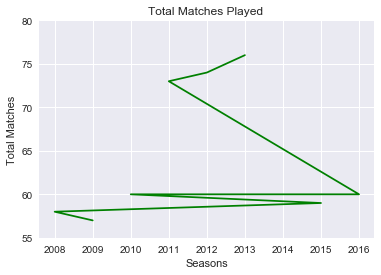

In [157]:
plt.plot(df, color = 'green')
plt.ylim(55,80)
plt.ylabel('Total Matches')
plt.xlabel('Seasons')
plt.title('Total Matches Played ')
plt.show()

The above graph shows that the total number of matches played each season is not consistent. This is due to the fact that the format has been changing in almost all the seasons. In Year 2011, and following two seasons the number of participating teams in IPL increased from 8 to 10 and hence it has consderably more number of matches.  During the season 2013, IPL had seen maximum number of matches played.  

#### Bar plot visual ####

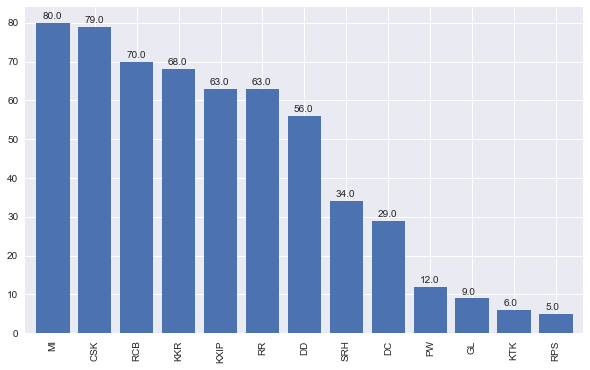

In [158]:
plt.figure(figsize=(10,6))
ax=matchesdf['winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


The above graph shows that Mumbai Indians(MI) having the higest number of wins in all the seasons follwed by Chennai Super Kings(CSK). Pune Supergiants have the lowest wins as they have played the lowest matches being one of the newest team participating in IPL season 2016. The Other newest team is Gujrat Lions but they have won more matches. Hence this graph is not performance graph of each team.

#### Subplot visuals ####

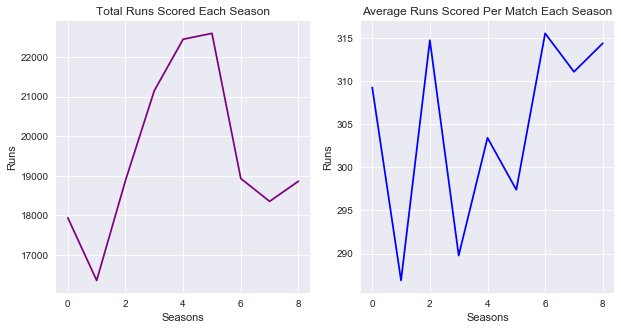

In [164]:
plt.figure(figsize=(10,5))
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
# season data frame to calculate the total number of runs scored in each of the season.
batsmen = matchesdf[['id','season']].merge(
                    deliveriesdf, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

#avgruns_each_season dataframe to calculate the average runs scored in the each seasons
avgruns_each_season=matchesdf.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=True)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']

plt.subplot(1,2,1)
plt.plot(season['total_runs'], color = 'purple')
plt.ylabel('Runs')
plt.xlabel('Seasons')
plt.title('Total Runs Scored Each Season')

plt.subplot(1,2,2)
plt.plot(avgruns_each_season['average_runs_per_match'], color = 'blue')
plt.ylabel('Runs')
plt.xlabel('Seasons')
plt.title('Average Runs Scored Per Match Each Season')

plt.show()

The above graph shows the total number of runs scored each season and average runs scored per match including both the innings. We see gradual increase in the runs scored from season 2009 to 2013. This is due to number of teams has been increased and the number of matches also increased. The inconsistency in the average runs scored each season is due to the fact that the venues of the matches affect the scoring. Season 2009 was played in South Africa, country known for bouncy pitches and hence scoring is difficult.

#### Boxplot visual ####

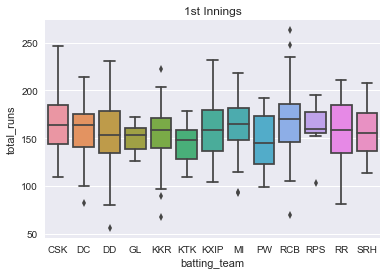

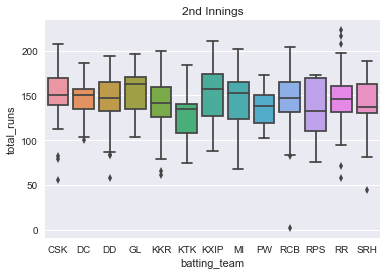

In [160]:
#plt.figure(figsize = (20,10))
xyz=deliveriesdf.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
#plt.subplot(1,2,1)
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
plt.show()
#plt.subplot(1,2,2)
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
plt.show()

According to Graph 1 the batting by CSK in innings 1 looks to be the best. Graph 2 also conveys the same story.
In Graph 2 we see a point near 0 which may seem to be outlier. But it is so because the match was disrupted. This is the comparision of batting in first and second inning.